In [2]:
%%sh
docker pull selenoid/vnc_chrome:128.0
docker pull selenoid/hub
docker pull aerokube/selenoid-ui

128.0: Pulling from selenoid/vnc_chrome
Digest: sha256:0a3626278323dc19584598fcc9d4209a4c1dc5ef2065b29812f1dc277d6e0640
Status: Image is up to date for selenoid/vnc_chrome:128.0
docker.io/selenoid/vnc_chrome:128.0
Using default tag: latest
latest: Pulling from selenoid/hub
Digest: sha256:b4d6171bd716a8d3c3f261ed8538f1c59614749db2fefa138ac0cd2bf176657e
Status: Image is up to date for selenoid/hub:latest
docker.io/selenoid/hub:latest
Using default tag: latest
latest: Pulling from aerokube/selenoid-ui
Digest: sha256:baf41696d54d6e77a331bc97b9ce1cd46175b47d9a3242a3848d2d120f46a1ea
Status: Image is up to date for aerokube/selenoid-ui:latest
docker.io/aerokube/selenoid-ui:latest


In [5]:
%%sh
docker-compose -f browser/docker-compose.yml up -d

 Container browser-selenoid-1  Starting
 Container browser-selenoid-1  Started
 Container browser-selenoid-ui-1  Starting
 Container browser-selenoid-ui-1  Started


In [6]:
%%sh
uv sync

Using CPython 3.13.2
Creating virtual environment at: .venv
Resolved 40 packages in 492ms
Installed 36 packages in 41ms
 + annotated-types==0.7.0
 + anyio==4.9.0
 + attrs==25.3.0
 + certifi==2025.1.31
 + click==8.1.8
 + h11==0.14.0
 + httpcore==1.0.7
 + httpx==0.28.1
 + httpx-sse==0.4.0
 + idna==3.10
 + markdown-it-py==3.0.0
 + mcp==1.6.0
 + mdurl==0.1.2
 + outcome==1.3.0.post0
 + pydantic==2.11.2
 + pydantic-core==2.33.1
 + pydantic-settings==2.8.1
 + pygments==2.19.1
 + pysocks==1.7.1
 + python-dotenv==1.1.0
 + rich==14.0.0
 + selenium==4.31.0
 + shellingham==1.5.4
 + sniffio==1.3.1
 + sortedcontainers==2.4.0
 + sse-starlette==2.2.1
 + starlette==0.46.1
 + trio==0.29.0
 + trio-websocket==0.12.2
 + typer==0.15.2
 + typing-extensions==4.13.1
 + typing-inspection==0.4.0
 + urllib3==2.4.0
 + uvicorn==0.34.0
 + websocket-client==1.8.0
 + wsproto==1.2.0


In [ ]:
# Go and choose the ".venv" virtual environment created by above cell.

In [36]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.remote.webelement import WebElement

options = ChromeOptions()
options.set_capability('browserName', 'chrome')
options.set_capability("selenoid:options", {"enableVNC": True, "enableVideo": False, "sessionTimeout": "10m"})
driver = webdriver.Remote("http://localhost:4444/wd/hub", options=options)

driver.get("https://news.ycombinator.com/newcomments")
wait = WebDriverWait(driver, 10)
wait.until(lambda driver: driver.execute_script("return document.readyState") == "complete")

True

In [ ]:
# Go and open http://localhost:8080/ in your browser to see the above-created driver. There you can connect to the browser with VNC.

In [ ]:
import cdp
import importlib 
importlib.reload(cdp)

from cdp import CDP
cdp = CDP(driver)

driver.execute_script(
"""
document.body.innerHTML= `
<h1>Display Radio Buttons</h1>

<form action="/action_page.php">
  <p>Please select your favorite Web language:</p>
  <input type="radio" id="html" name="fav_language" value="HTML">
  <label for="html">HTML</label><br>
  <input type="radio" id="css" name="fav_language" value="CSS">
  <label for="css">CSS</label><br>
  <input type="radio" id="javascript" name="fav_language" value="JavaScript">
  <label for="javascript">JavaScript</label>
å
  <br>  

  <p>Please select your age:</p>
  <input type="radio" id="age1" name="age" value="30">
  <label for="age1">0 - 30</label><br>
  <input type="radio" id="age2" name="age" value="60">
  <label for="age2">31 - 60</label><br>  
  <input type="radio" id="age3" name="age" value="100">
  <label for="age3">61 - 100</label><br><br>
  <input type="submit" value="Submit">
</form>`
"""
)
print(cdp.interactor.doSetValue(3460, 'unchecked'))
print(cdp.interactor.getValue(3460))


['lang', 'en', 'op', 'newcomments']
{
  "root": {
    "backendNodeId": 1,
    "baseURL": "https://news.ycombinator.com/newcomments",
    "childNodeCount": 1,
    "children": [
      {
        "attributes": {
          "lang": "en",
          "op": "newcomments"
        },
        "backendNodeId": 23,
        "childNodeCount": 2,
        "children": [
          {
            "attributes": [],
            "backendNodeId": 31,
            "childNodeCount": 2,
            "children": [
              {
                "attributes": [],
                "backendNodeId": 32,
                "childNodeCount": 1,
                "children": [
                  {
                    "attributes": [
                      "id",
                      "hnmain",
                      "border",
                      "0",
                      "cellpadding",
                      "0",
                      "cellspacing",
                      "0",
                      "width",
                      "85

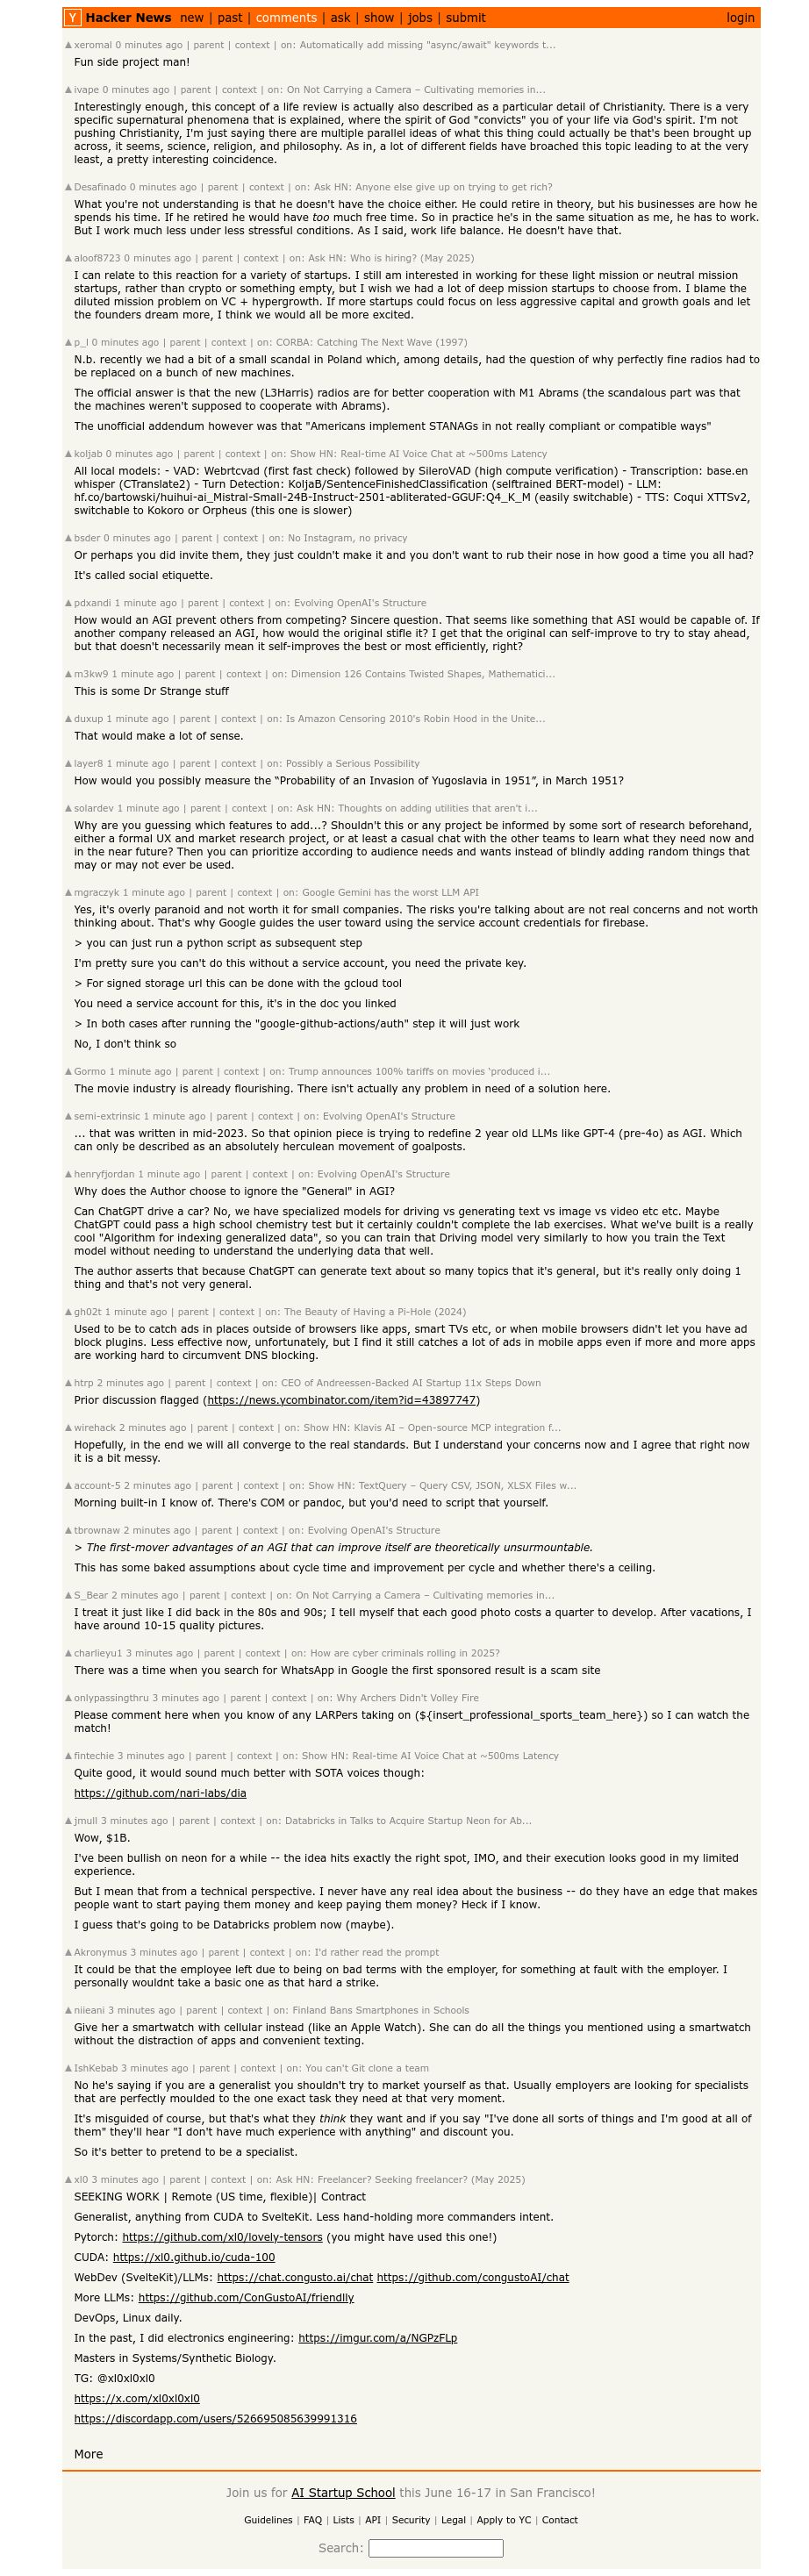

In [37]:
import json
from IPython.display import JSON, Image, display

import cdp
import importlib 
importlib.reload(cdp)

from cdp import CDP
cdp = CDP(driver)

richDocument = cdp.dom.getRichDocument()
print(json.dumps(richDocument, indent=2))

display(Image(data=cdp.visualizer.getImage(), format="jpeg"))

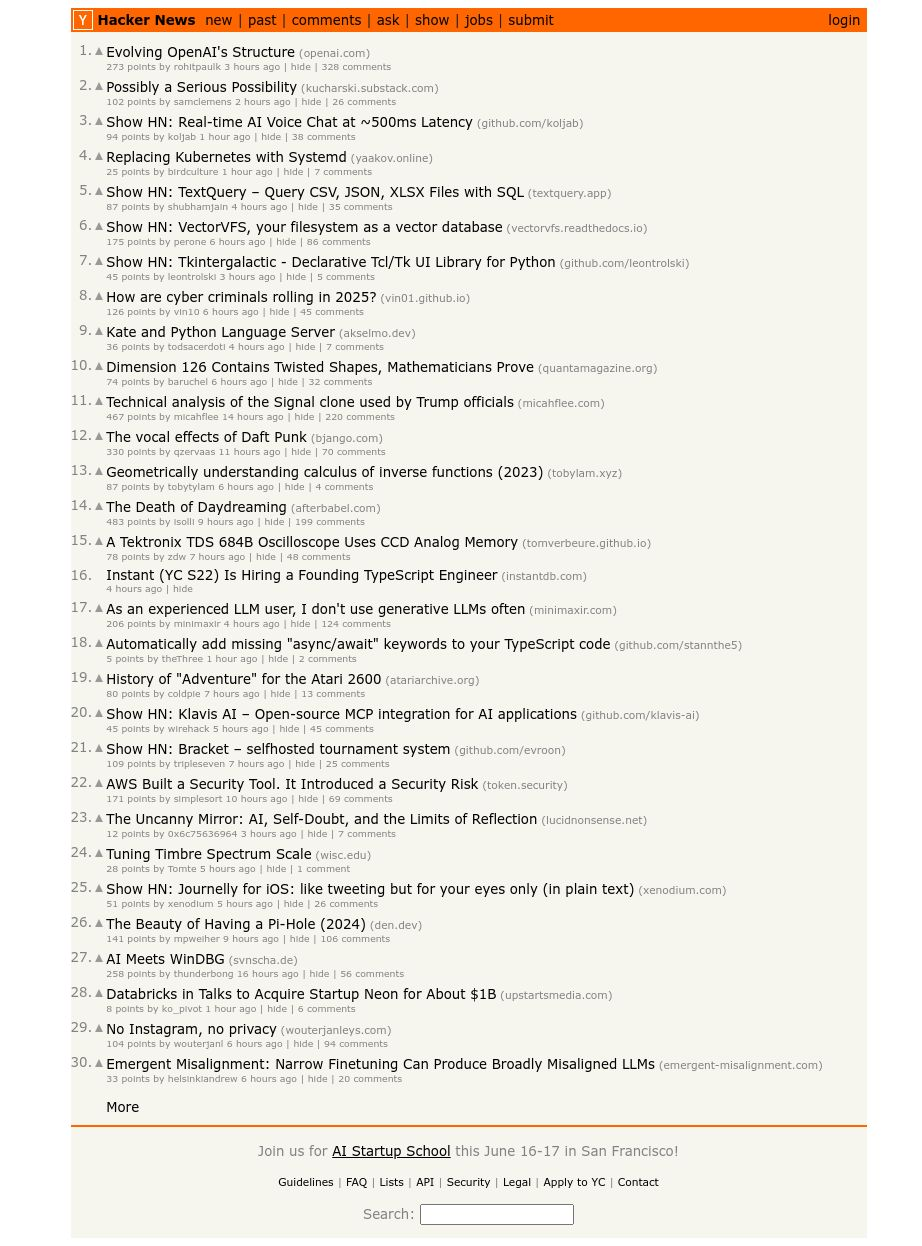

In [35]:
predicate = lambda node: 'nodeName' in node and node['nodeName'] == 'A'
aLink = cdp.interactor.findDocumentNode(richDocument['root'], predicate)
cdp.interactor.doClick(aLink['backendNodeId'])

display(Image(data=cdp.visualizer.getImage(), format="jpeg"))

In [12]:
import openai
import os
os.environ["OPENAI_API_KEY"]='...'

client = openai.OpenAI()
response = client.embeddings.create(
    input="This is a test sentence.",
    model="text-embedding-ada-002"
)

embedding = response.data[0].embedding
print(embedding)

[-0.0011391325388103724, -0.003206387162208557, 0.002380132209509611, -0.004501554183661938, -0.010328996926546097, 0.012922565452754498, -0.005491119809448719, -0.0029864837415516376, -0.007327961269766092, -0.03365817293524742, 0.014099695719778538, 0.03262333199381828, -0.010037948377430439, -0.0006289887242019176, 0.0022782650776207447, -0.003689851611852646, 0.03202829882502556, -0.0006471792585216463, 0.024538645520806313, -0.006260782480239868, 0.005086885765194893, 0.0016549356514587998, -0.009313560090959072, 0.013245952315628529, -0.02629787288606167, -0.015548471361398697, 0.009863318875432014, -0.022675933316349983, 0.01716540940105915, 0.00252565648406744, 0.0061217257753014565, -0.014423083513975143, -0.004886385519057512, -0.016428085044026375, 0.007237412501126528, 0.0007579394732601941, 0.0025353580713272095, -0.01888583041727543, 0.012728532776236534, -0.017385313287377357, 0.019066927954554558, 0.007243880536407232, 0.0012377657694742084, -0.025133678689599037, -0.00

In [ ]:
%ai list
%%ai openai:gpt-3.5-turbo-instruct -f code
Please write a Python code that ...